In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# II. Description des données


## Exploration et préparation des données

In [71]:
# Chargement des données
df = pd.read_csv('heart.csv')

In [72]:
# Affichage des premières lignes du dataset
display(df.head())

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Description des métas données

* **Age** : âge du patient (variable numérique continue)
* **Sex** : sexe biologique (M ou F, variable catégorielle binaire)
* **ChestPainType** : type de douleur thoracique (ATA, NAP, ASY, TA)
* **RestingBP** : pression artérielle au repos (en mm Hg)
* **Cholesterol** : taux de cholestérol sérique (en mg/dl)
* **FastingBS** : glycémie à jeun supérieure à 120 mg/dl (0 ou 1)
* **RestingECG** : résultat de l’électrocardiogramme au repos (Normal, ST, LVH)
* **MaxHR** : fréquence cardiaque maximale atteinte pendant un effort
* **ExerciseAngina** : présence d’angine induite par l’exercice (Y ou N)
* **Oldpeak** : dépression ST induite par l’exercice (valeur continue en mm)
* **ST_Slope** : pente du segment ST pendant l’effort (Up, Flat, Down)
* **HeartDisease** : présence ou non d’une maladie cardiaque (0 = non, 1 = oui)

In [73]:
# Affichage des informations du dataset
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


None

Après visualisation des informations du dataset, nous constate que le dataset ne contient aucune valeur manquante. Il n'y aura donc pas de traitement de valeur manquante à faire à ce niveau

In [74]:
# Afficher si le dataset contient des doublons
df[df.duplicated(keep=False)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


Nous voyons bien que le dataset ne contient pas de doublons.
Le seul traitement à faire à ce niveau consernerai les valeurs abbérentes et incohérentes

## Traitement des valeurs incohérentes

In [75]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

## Données numériques

In [76]:
# Statistiques descriptives des données numériques
display(df.describe())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Le résumé statistique révèle une population d'âge moyen (53,5 ans) avec une majorité présentant une maladie cardiaque (55,3 %). Certaines variables comme RestingBP et Cholesterol affichent des valeurs nulles cliniquement aberrantes, suggérant un encodage des données manquantes. De même, des valeurs négatives dans Oldpeak nécessitent une vérification approfondie. La variabilité observée dans MaxHR et Oldpeak en fait des variables pertinentes pour la modélisation. Ces constats motivent un prétraitement rigoureux incluant l'imputation, la normalisation et le traitement des outliers avant toute étape de modélisation prédictive.

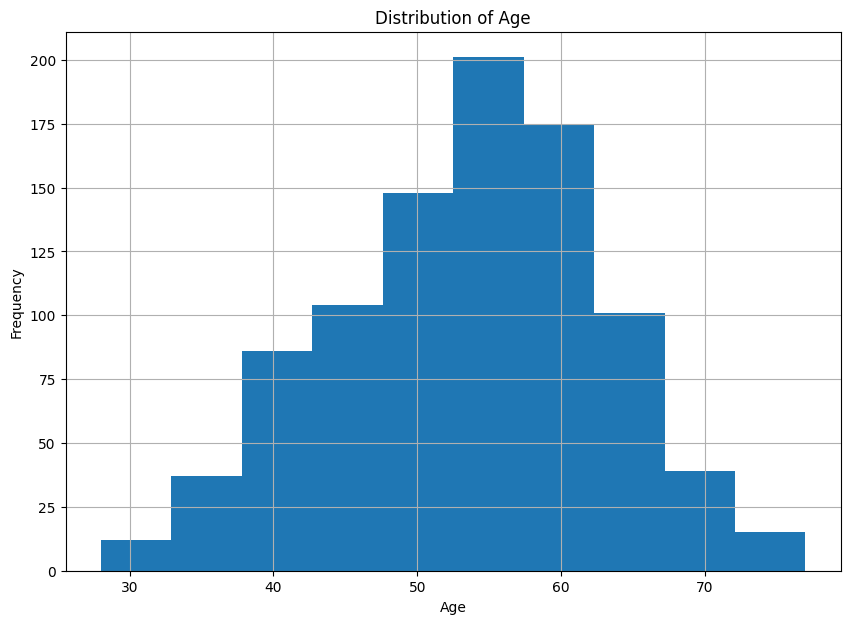

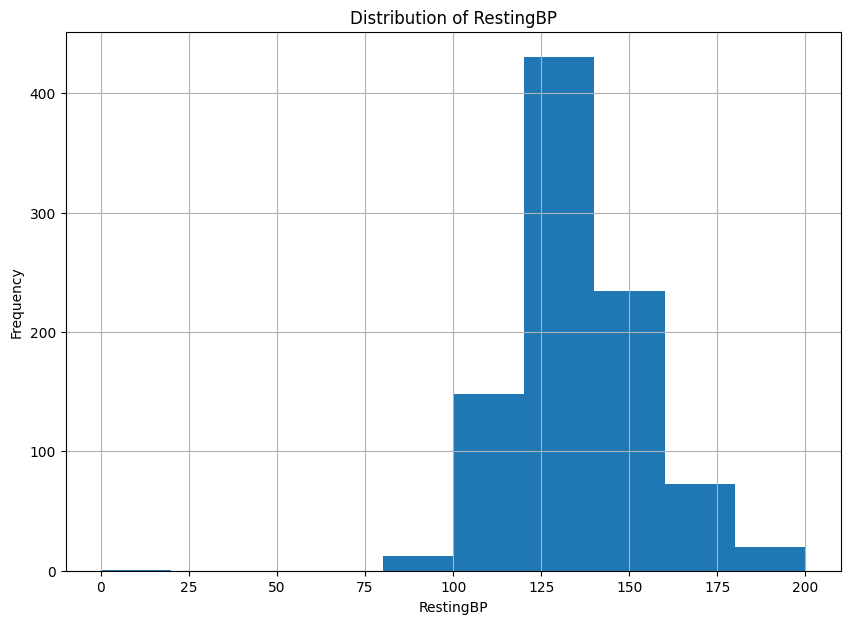

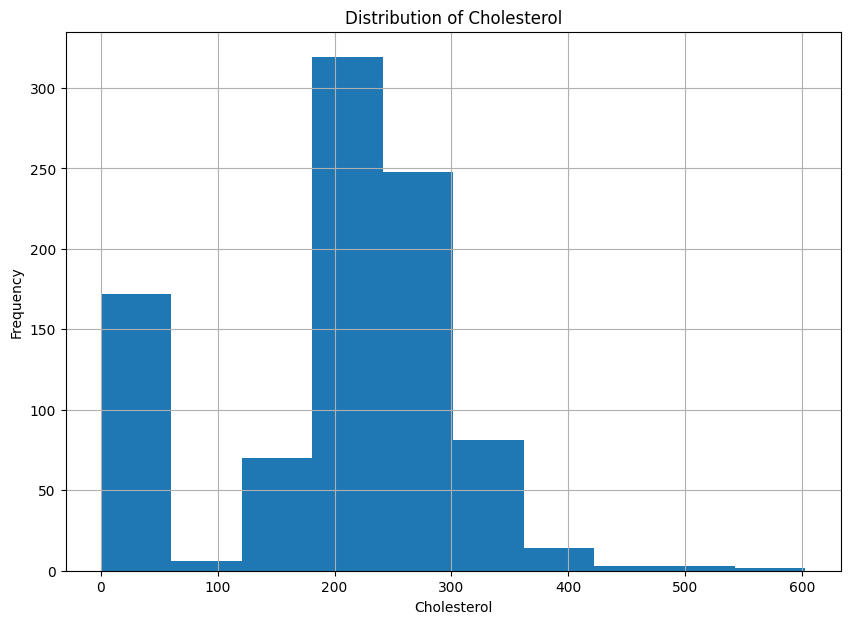

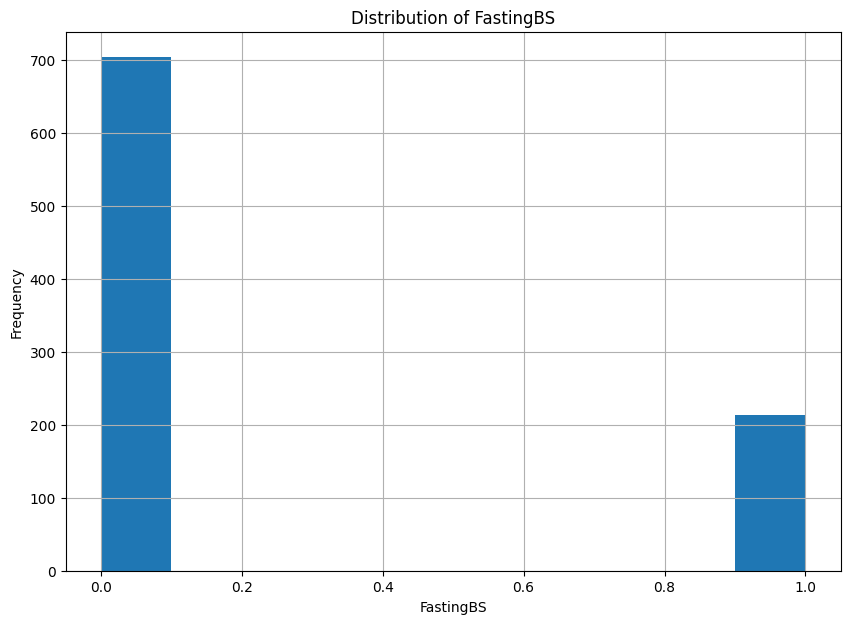

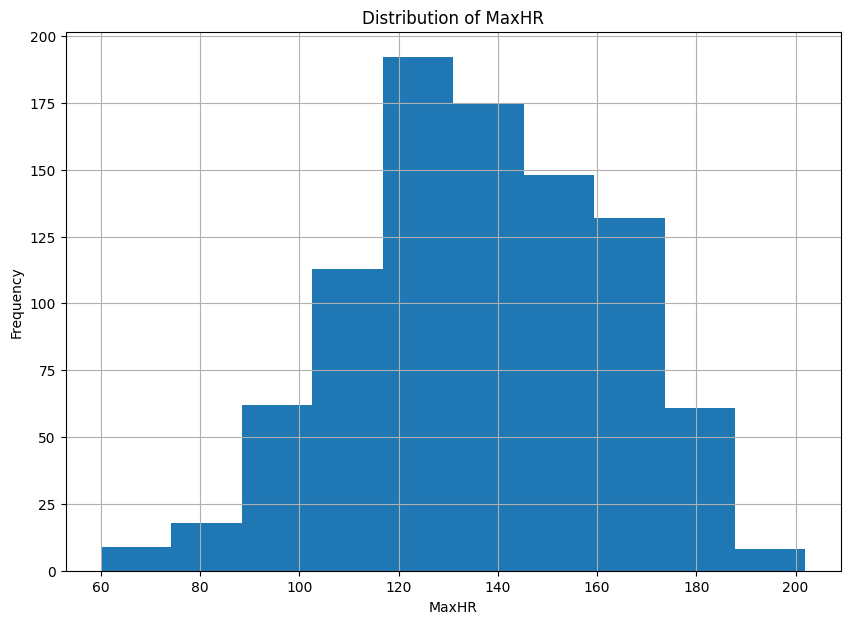

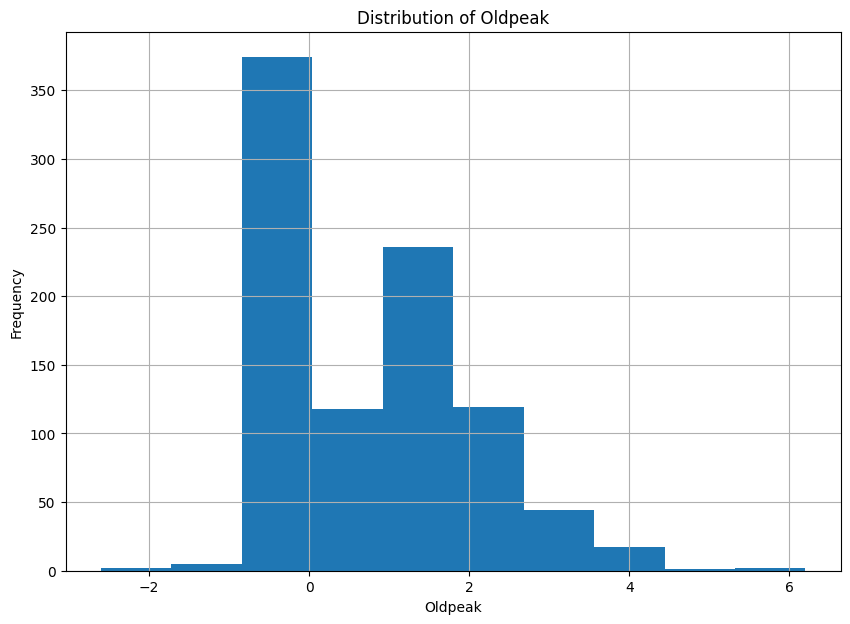

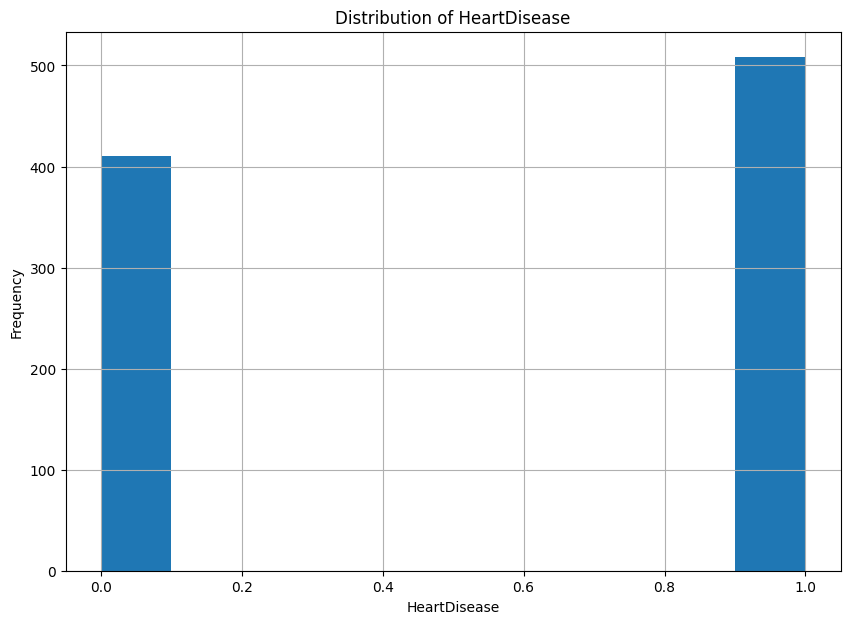

In [77]:
for col in numerical_cols:
  plt.figure(figsize=(10, 7))
  df[col].hist()
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

In [78]:
df[df['Cholesterol'] <= 100]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
78,52,M,ATA,140,100,0,Normal,138,Y,0.0,Up,0
98,56,M,ASY,120,85,0,Normal,140,N,0.0,Up,0
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


On observe que près de 172 individus présentent un taux de cholestérol inférieur ou égal à 100 mg/dl, soit environ 19,06 % de l’ensemble du jeu de données. Cette proportion relativement importante (près d’un cinquième du total) suggère qu’il ne s’agit pas uniquement de valeurs aberrantes ou manquantes mal encodées, mais bien d’un signal potentiellement significatif.

Dans ce contexte, nous faisons l’hypothèse que ces valeurs peuvent contribuer à la discrimination des classes par le modèle. En conséquence, aucune suppression ni imputation ne sera appliquée à ces entrées dans l’étape de prétraitement.

In [79]:
df[df['RestingBP'] <= 10]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


L’analyse de la variable RestingBP (pression artérielle au repos) révèle qu’un seul individu présente une valeur de 0 mm Hg, ce qui est cliniquement impossible. Cette valeur est vraisemblablement une erreur de saisie ou un encodage incorrect d'une donnée manquante.

Étant donné qu’elle concerne une seule observation sur les 918 présentes dans le jeu de données (soit environ 0,1 %), son impact est négligeable sur la distribution générale. Nous décidons donc de supprimer cette ligne du dataset afin de préserver la qualité des données sans introduire d’imputation artificielle.

In [80]:
df = df[df['RestingBP'] != 0]

Bien, passons à l'encodage des valeurs numériques du dataset

Au vu de la distribution des données, nous comptions les appliquées un **StandartScaler**.

L'application du StandardScaler est méthodologiquement justifiée pour toutes les variables numériques continues, notamment **Age**, **RestingBP**, **Cholesterol**, **MaxHR**, et **Oldpeak**, en raison de leurs échelles différentes, de leur distribution, ou de leur dispersion.

In [81]:
scaler = StandardScaler()
df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',]] = scaler.fit_transform(
    df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',]]
)

/tmp/ipython-input-81-319423039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak',]] = scaler.fit_transform(


## Données catégorielles

In [82]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [83]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

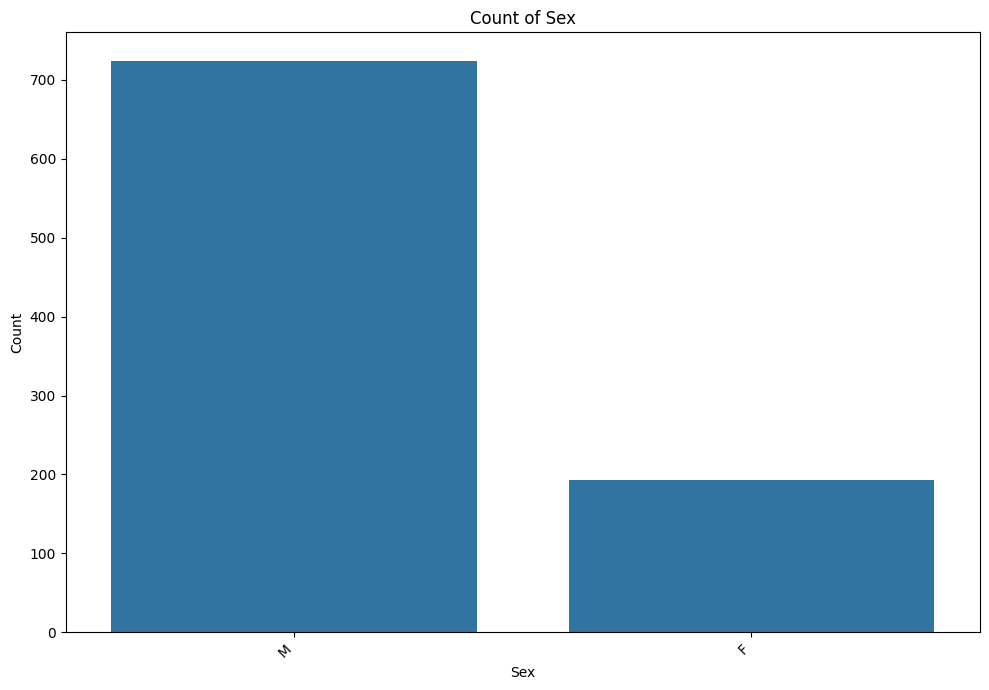

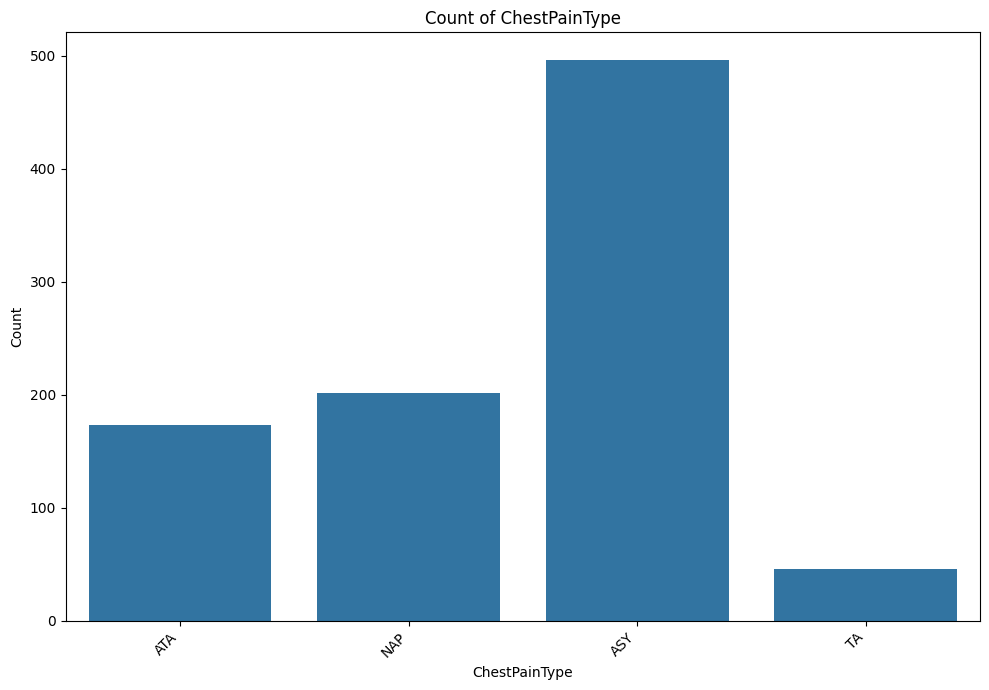

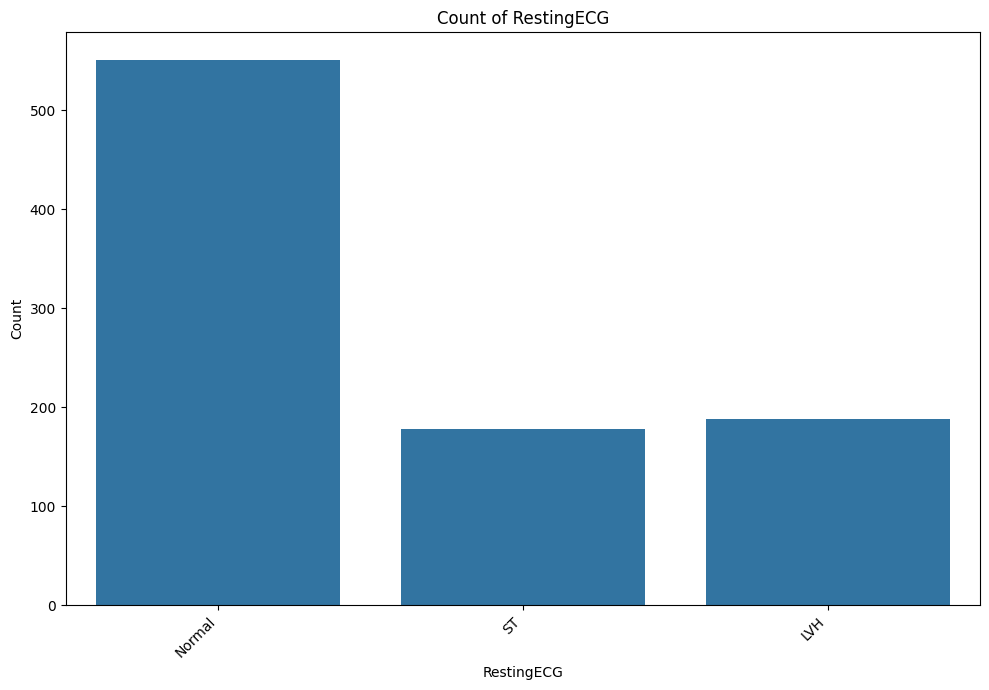

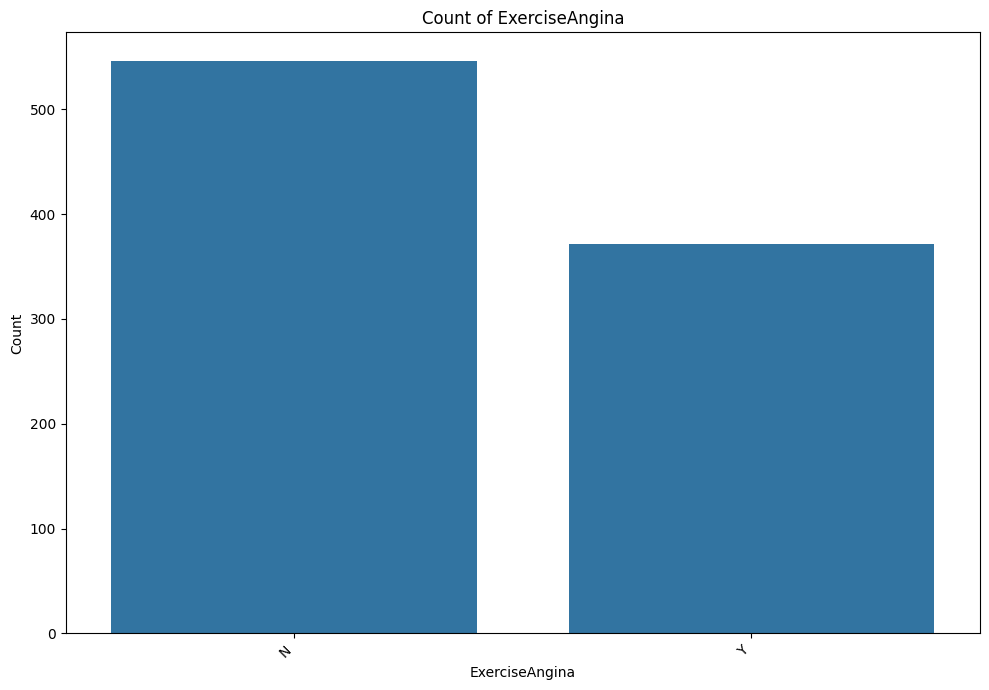

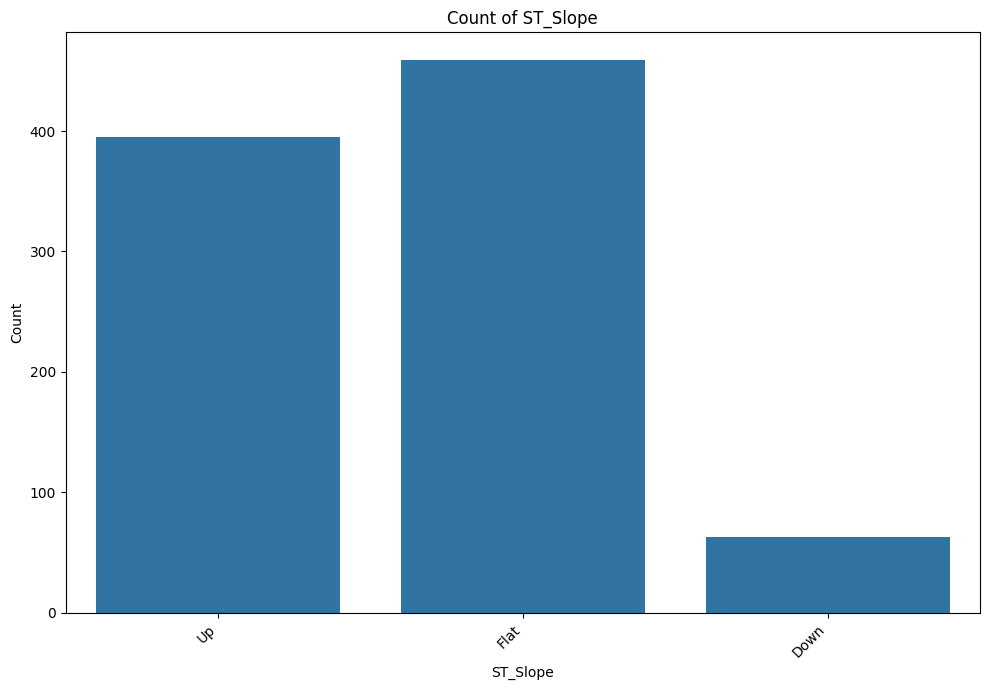

In [85]:
df_before_encoding = df.copy()


for col in categorical_cols:
  plt.figure(figsize=(10, 7))
  sns.countplot(x=col, data=df_before_encoding) # Use the copy of the dataframe
  plt.title(f'Count of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

Sex : Variable binaire sans ordre, un encodage simple (0 pour F, 1 pour M) suffit.

ChestPainType : Catégorie sans hiérarchie, un encodage One-Hot est utilisé pour éviter tout ordre artificiel.

RestingECG : Variable nominale à trois modalités, encodée en One-Hot pour préserver l’indépendance des états.

ExerciseAngina : Donnée binaire (Y/N), directement transformée en 0 et 1.

ST_Slope : Variable ordinale (Up < Flat < Down), encodée selon l’ordre médical croissant de gravité.

In [86]:
# Encodage binaire
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'Y': 1, 'N': 0})

# Encodage ordinal
df['ST_Slope'] = df['ST_Slope'].map({'Up': 0, 'Flat': 1, 'Down': 2})

# Encodage One-Hot (don't drop the original columns here)
df = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG'], drop_first=True)

## Choix du modèle, prédiction et Conclusion

In [92]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choix du modèle

La **régression logistique** a été choisie pour ce problème car il s’agit d’un modèle de classification binaire particulièrement adapté à la prédiction de la présence ou non d’une maladie cardiaque. Elle permet d’estimer directement la probabilité d’occurrence d’un événement, ici la présence d’une pathologie, à partir de variables explicatives à la fois numériques et catégorielles. Son interprétabilité est un atout majeur dans un contexte médical, car chaque coefficient du modèle peut être analysé pour comprendre l’impact d’un facteur de risque sur la probabilité d’être malade. De plus, sa robustesse, sa simplicité de mise en œuvre et sa faible sensibilité au surapprentissage en font un excellent modèle de référence pour des données structurées. Enfin, elle constitue une baseline fiable pour évaluer la pertinence de modèles plus complexes.

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)
performance = model.score(X_test, y_test)

In [89]:
performance

0.8532608695652174

### Évaluation du modèle

In [93]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Evaluate the model
y_pred = model.predict(X_test)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        72
           1       0.90      0.86      0.88       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184




AUC Score: 0.9028


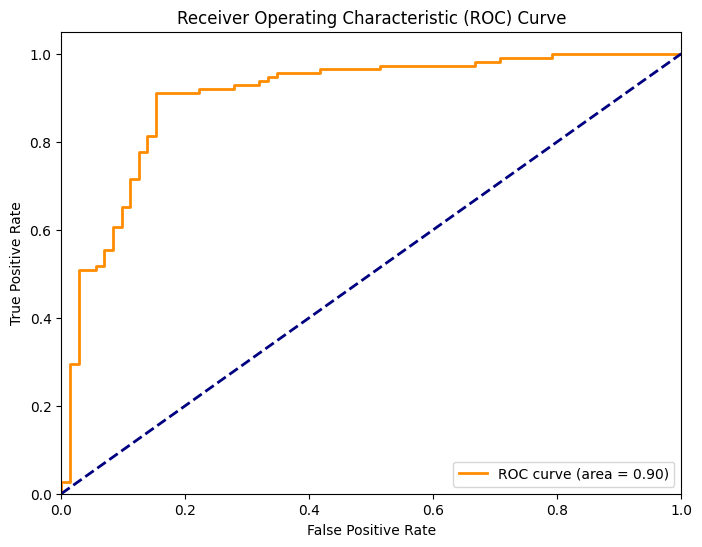

In [91]:
# ROC Curve and AUC
y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

print(f"\nAUC Score: {roc_auc:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Conclusion Générale
Le modèle de classification démontre une performance globalement très solide.

- L'AUC de 0.90 sur la courbe ROC est le signe d'un modèle avec une forte capacité discriminatoire, capable de bien séparer les classes.

- Les métriques de précision, rappel et F1-score pour les deux classes sont toutes élevées (autour de 0.82 à 0.90), ce qui indique que le modèle n'est pas seulement bon en général, mais qu'il performe bien pour chaque catégorie de sortie. Il gère bien à la fois les faux positifs et les faux négatifs pour les deux classes.

- L'accuracy de 0.85 confirme cette bonne performance globale.

Points forts :

- Excellente capacité à distinguer les classes (AUC élevé).

- Bon équilibre entre précision et rappel pour les deux classes.

- Haute précision globale.